In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate


def plot(data, title, scale=None):
        temperature = np.roll(data, data.shape[1] // 2, axis=1)

        fig = plt.figure(figsize=(20,9))
        map = Basemap(projection='cyl', resolution = 'i', area_thresh = 0.3, llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90.0, anchor = 'SW')
        map.drawcoastlines()
        map.drawcountries()
        map.drawparallels(np.arange(-90,90,15.0),labels=[1,1,0,1])
        map.drawmeridians(np.arange(-180,180,15),labels=[1,1,0,1])

        # temperature2 = upscale(temperature, fig)
        heatmap = plt.pcolormesh(
            np.linspace(-180, 180, num = temperature.shape[1]+1),
            np.linspace(-90, 90, num = temperature.shape[0]+1),
            temperature, 
            cmap='bwr',
            shading='flat',
            vmin = scale[0],
            vmax = scale[1]
        )

        map.colorbar(heatmap, pad=1)
        plt.title(title, 
            {
                'fontsize' : 30
            }
        )
        fig.show()



def report(data, i, plot_mask=[True, True, True]):
    data = data[i]
    output = np.array(data['output']).squeeze()
    input = np.array(data['input']).squeeze()
    prediction = np.array(data['prediction']).squeeze()

    # Need to figure out which input is which, since input.shape will be (X, 32, 64)

    print(output.shape)
    print(input.shape)

    if input.shape != (128, 256):
        input = input[0].squeeze() 
        print(input.shape)

    print('INFO:')
    table = [
        ['input variables', data['variables']],
        ['output variables', data['out_variables']],
        ['lead time', f"{data['lead_times']*100} hrs"],
        ['climate model', data['climate_model_init']],
        ['days since 1850', data['days_since_1850']],
    ]
    print(tabulate(table, tablefmt = "heavy_grid"))
    print()
    print('METRICS:')
    for i in data['metrics']:
        print(i)
        print(tabulate([[j, data['metrics'][i][j]] for j in data['metrics'][i]], tablefmt = "rounded_grid"))

    min_range = min([np.amin(input), np.amin(prediction), np.amin(output), -80+273]) 
    max_range = max([np.amax(input), np.amax(prediction), np.amax(output), 60+273]) 
    scale = (min_range, max_range)
    if plot_mask[0]: plot(input, 'Input', scale)
    if plot_mask[1]: plot(prediction, 'Prediction', scale)
    if plot_mask[2]: plot(output, 'Expected Output', scale)
    print()

Shape: (273, 1, 128, 256)
[[247.25298 247.25793 247.2632  ... 247.25415 247.25214 247.25053]
 [248.87137 248.94289 248.99922 ... 248.69405 248.76027 248.82231]
 [250.79585 250.86913 250.9292  ... 250.86282 250.82248 250.77591]
 ...
 [247.9231  247.84375 247.73888 ... 247.9481  247.94809 247.94424]
 [249.46312 249.42455 249.39273 ... 249.58998 249.54018 249.49524]
 [249.69702 249.77429 249.84132 ... 249.46783 249.54326 249.61707]]
220.79373
310.62964


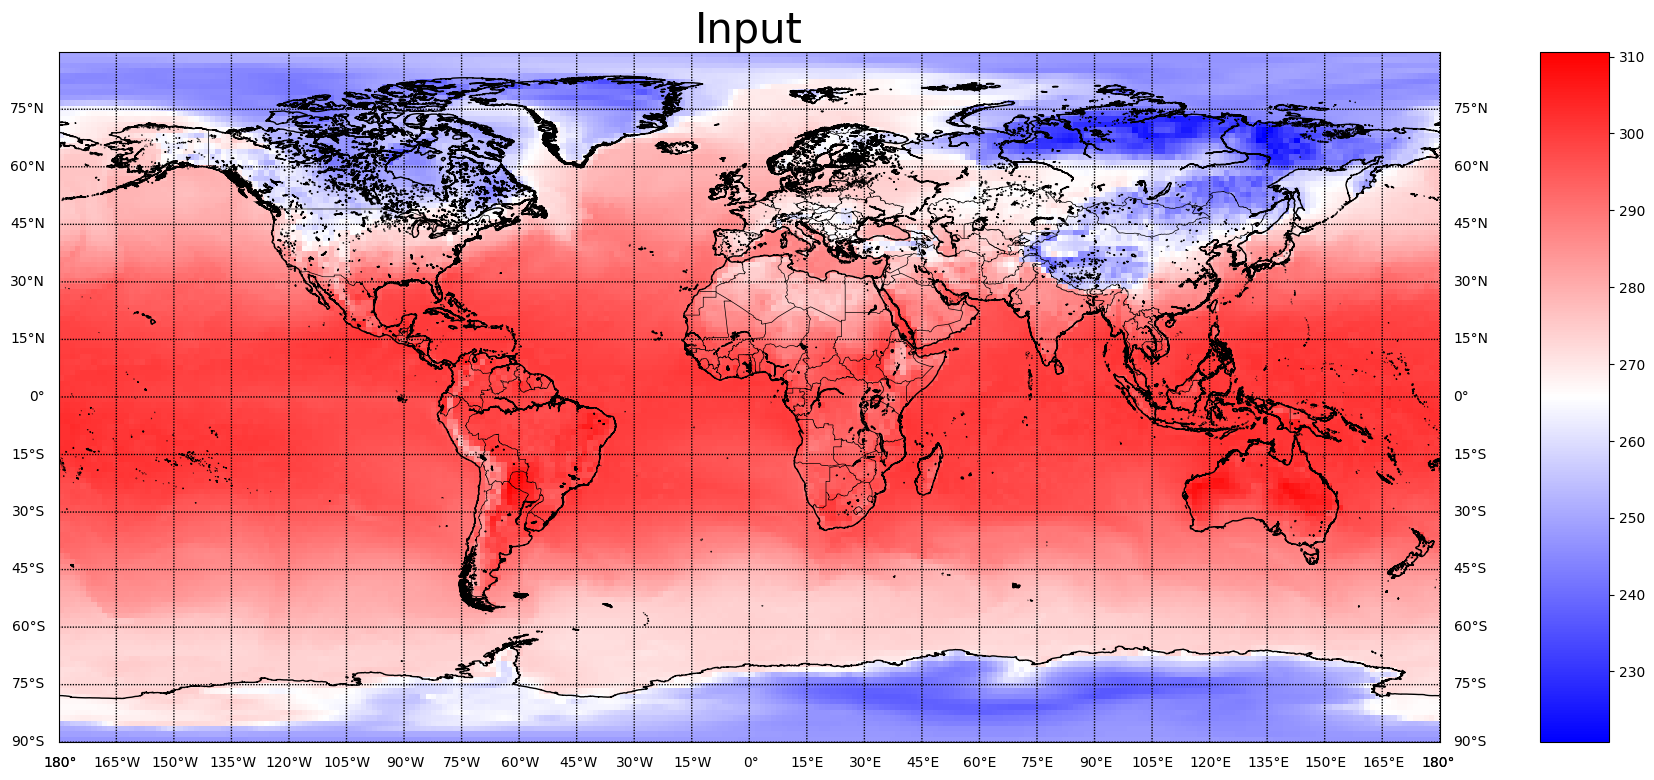

In [43]:
PATH = '/home/advit/test_new2/test/2017_0.npz'
PATH = '/home/data/datasets/climate/era5/1.40625_npz/test/2017_0.npz'

# # Load in the temperatre data into array
x = np.load(PATH, mmap_mode='r')

temp_data = x['2m_temperature']
print(f"Shape: {temp_data.shape}")

temp_data_time_0 = temp_data[0]
data = temp_data_time_0.squeeze() 

plot(data, 'Input', )

print(np.amin(data))
print(np.amax(data))

(128, 256)
(128, 256)
INFO:
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

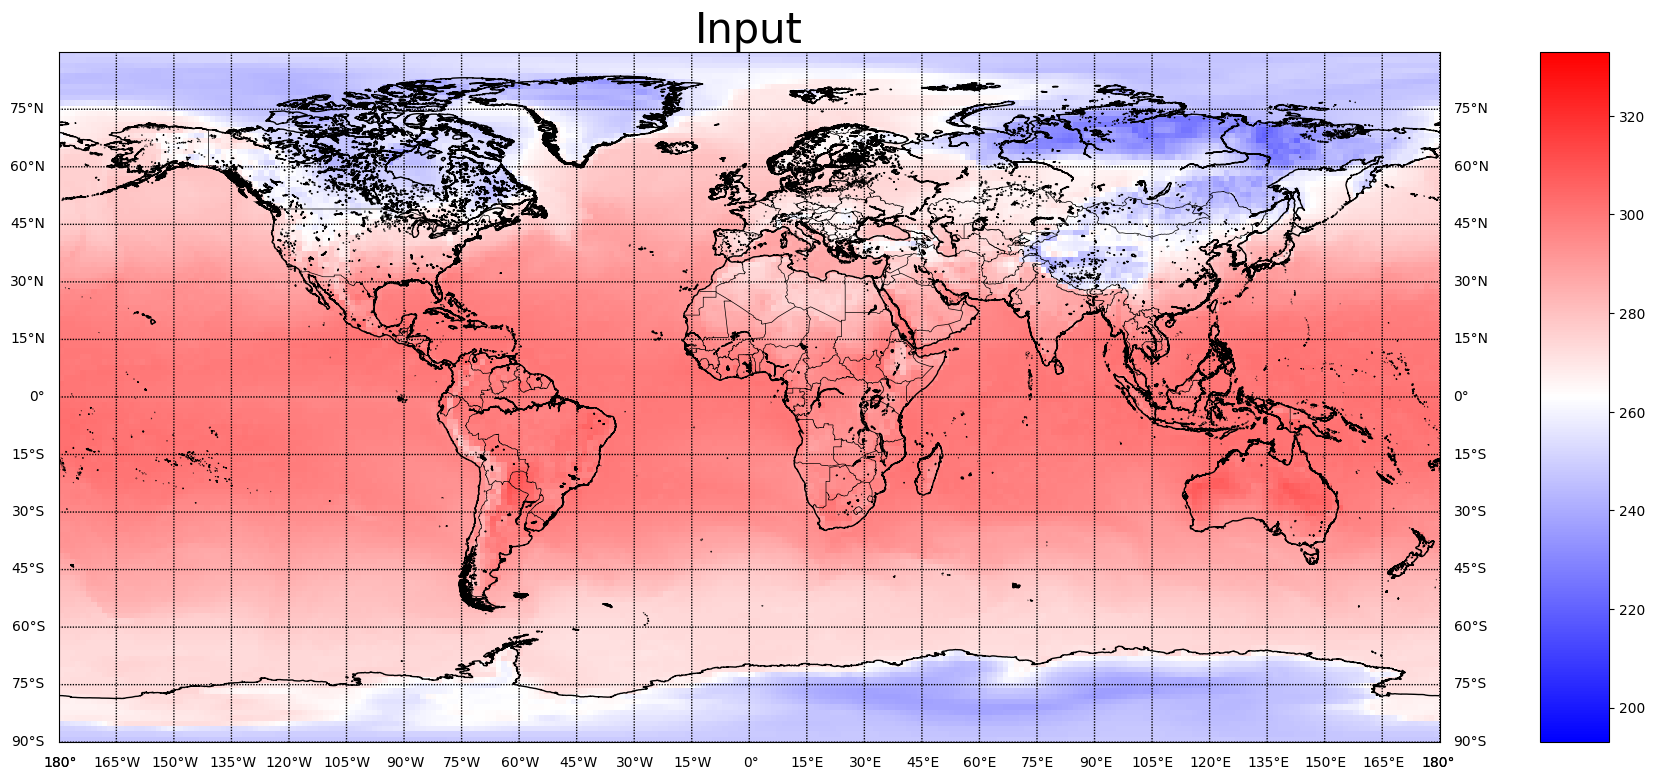

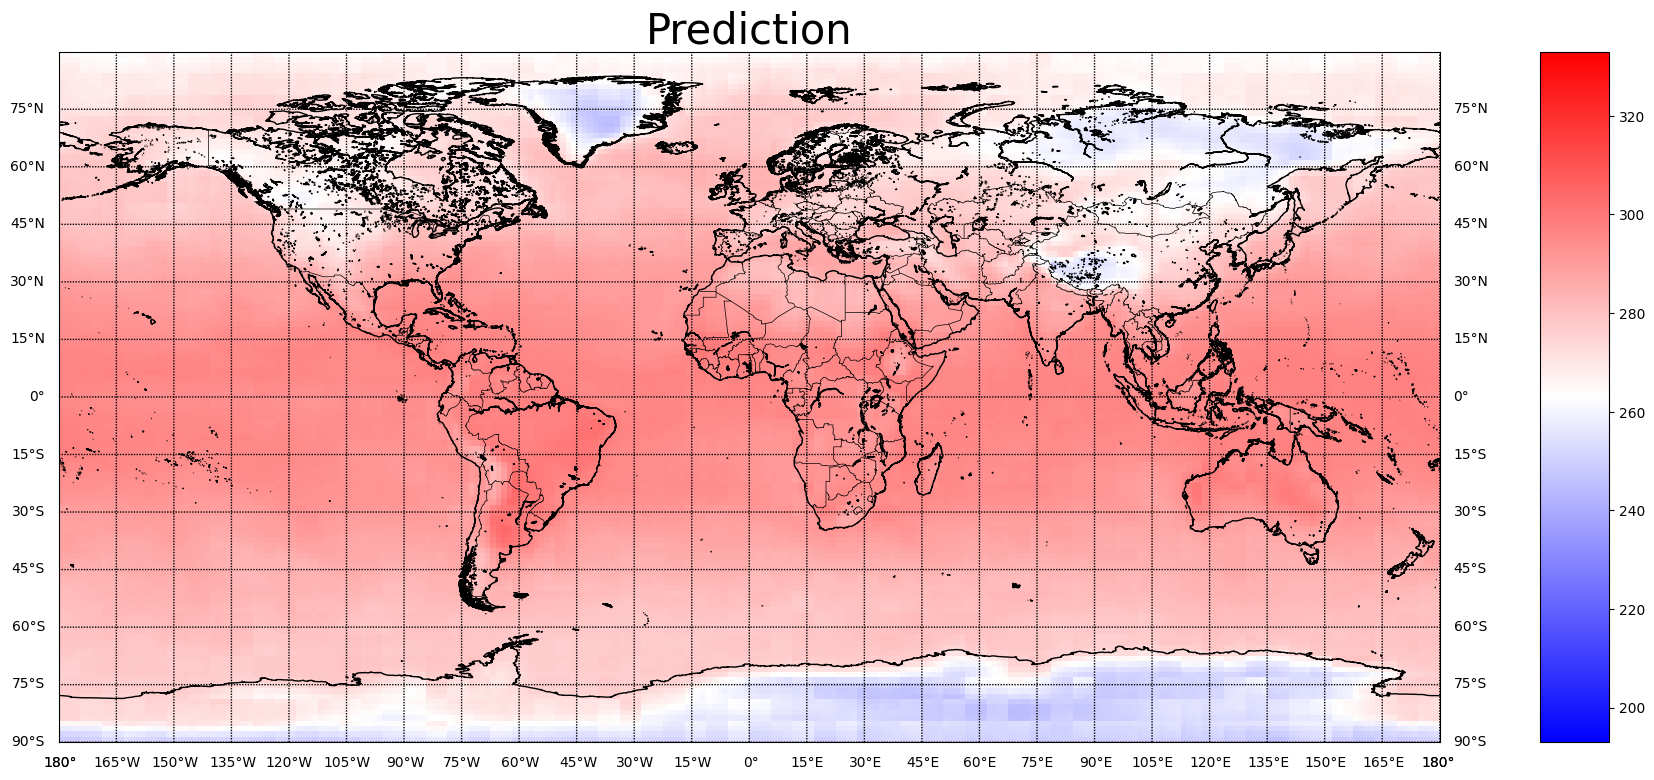

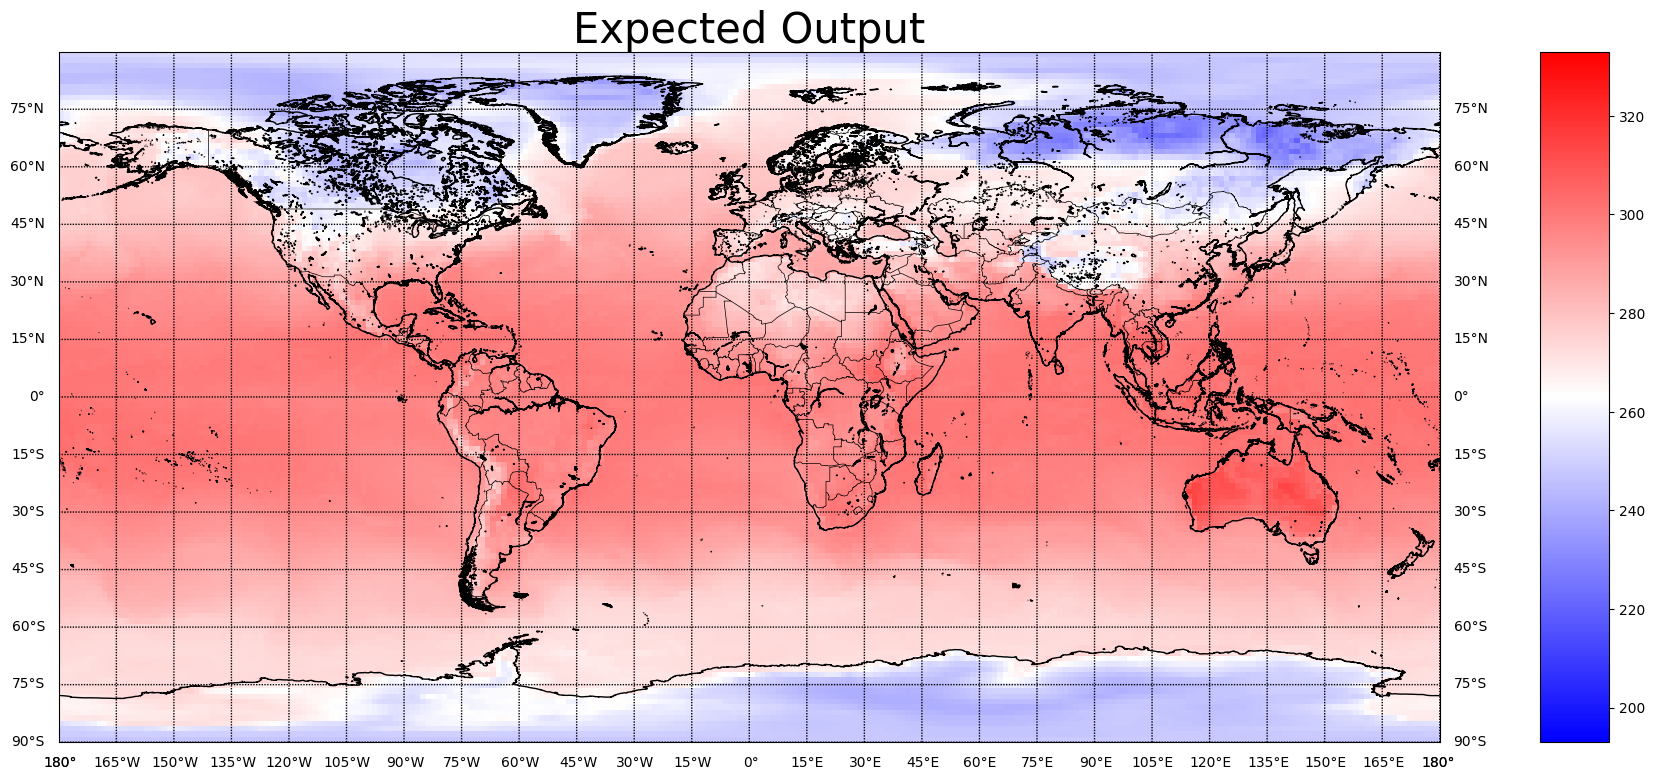

In [2]:
with open(r'/localhome/advit/sep15_exps/shard_0_hrs_0006.json', 'r') as f:
    data1 = json.load(f)
report(data1, 0)

(128, 256)
(2, 128, 256)
(128, 256)
INFO:
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ input variables  ┃ ['relative_humidity_50', '2m_temperature'] ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ output variables ┃ ['2m_temperature']                         ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ lead time        ┃ 47.999998927116394 hrs                     ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ climate model    ┃                                            ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ days since 1850  ┃ 60996.0                                    ┃
┗━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

METRICS:
lat_weighted_mse_val
╭──────────────────────────────┬──────────╮
│ w_mse_2m_temperature_1_hours │ 0.148321 │
├──────────────────────────────┼──────────┤
│ w_mse                        │ 0.148321 │
╰────────────────────────

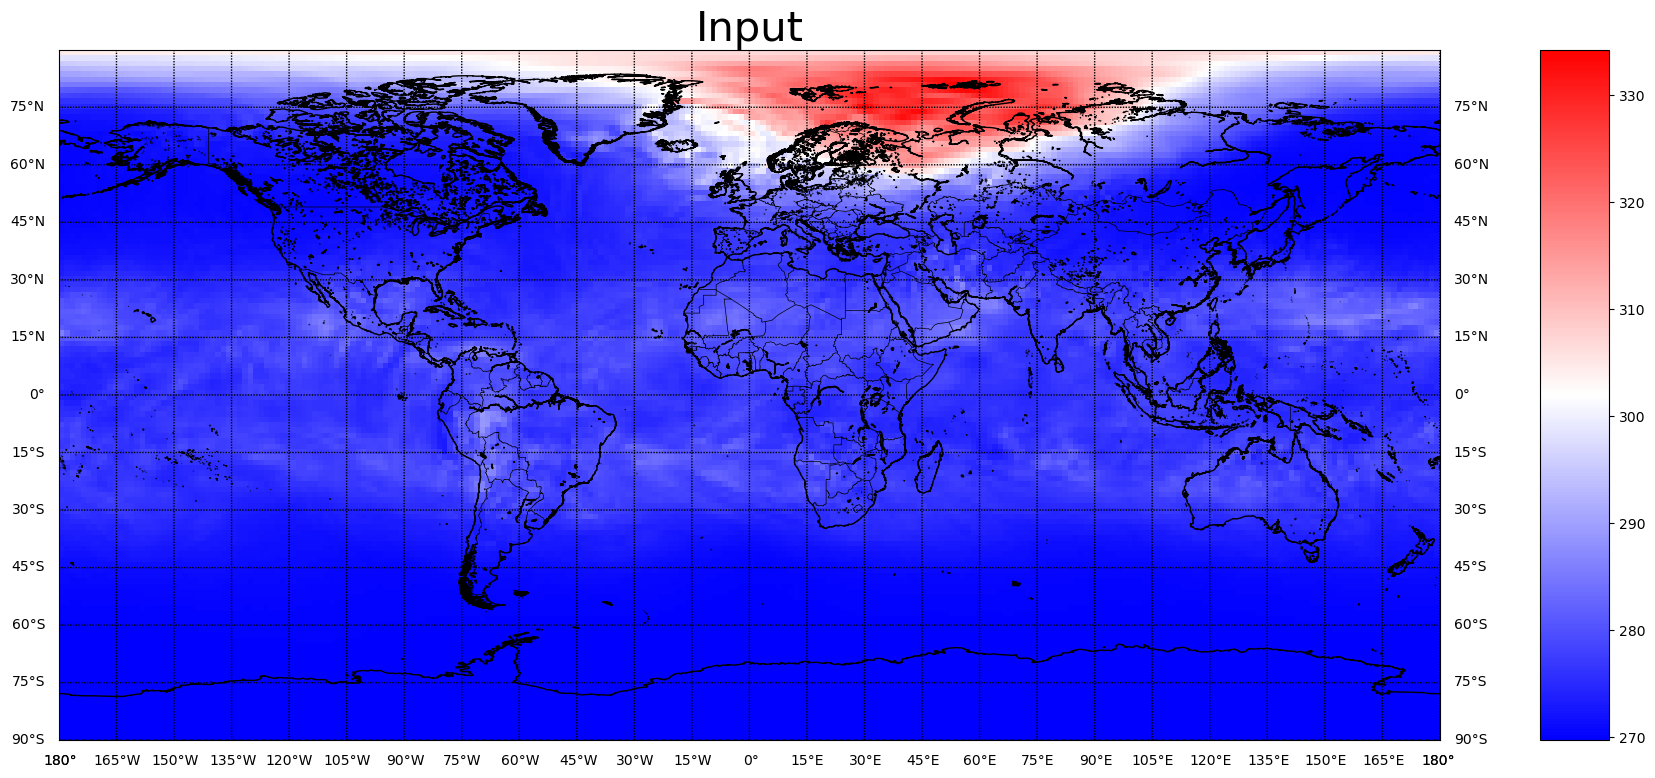

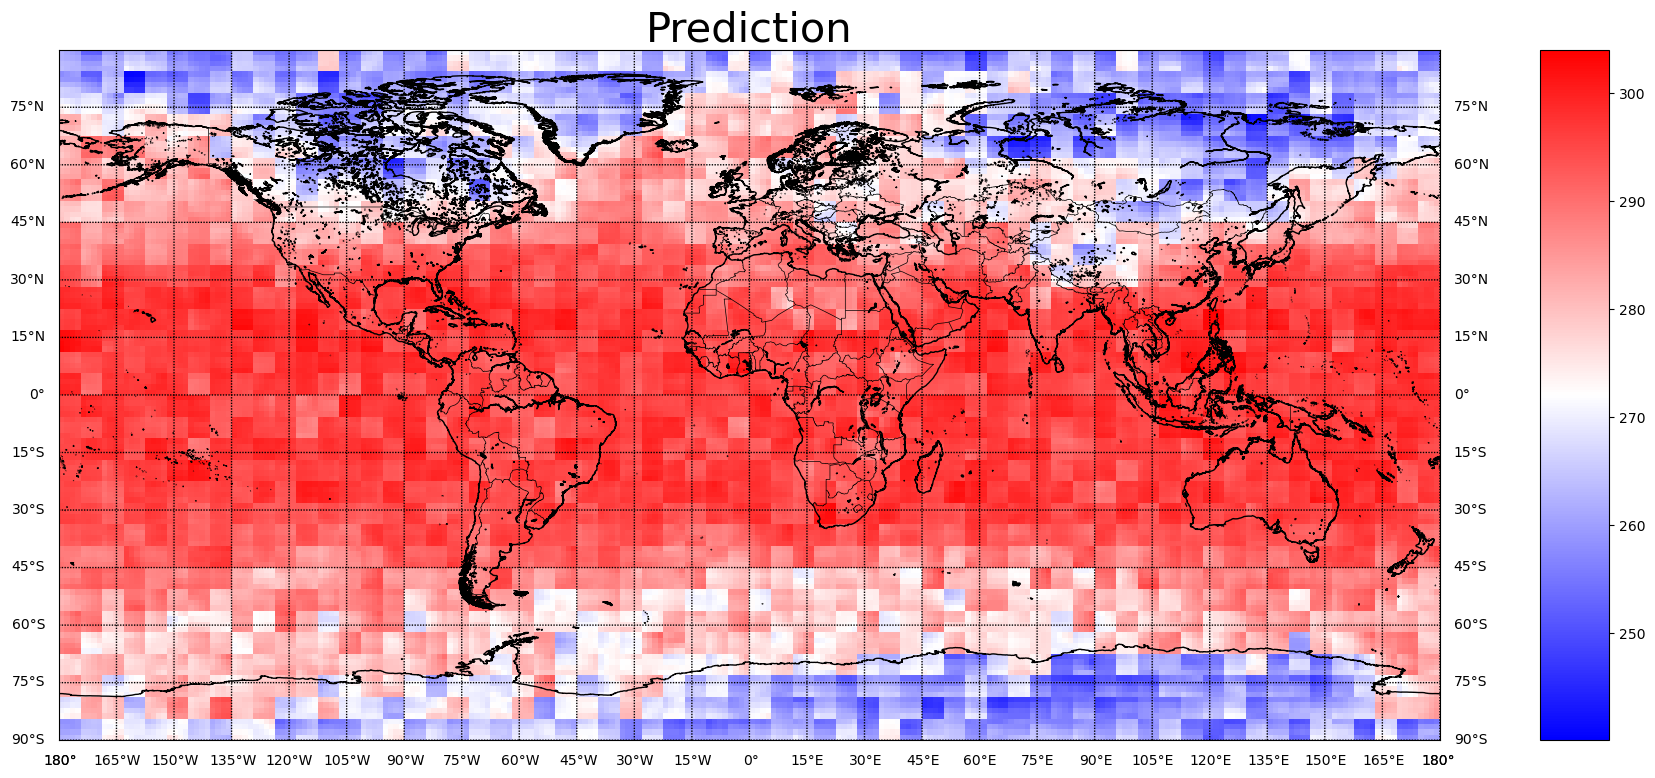

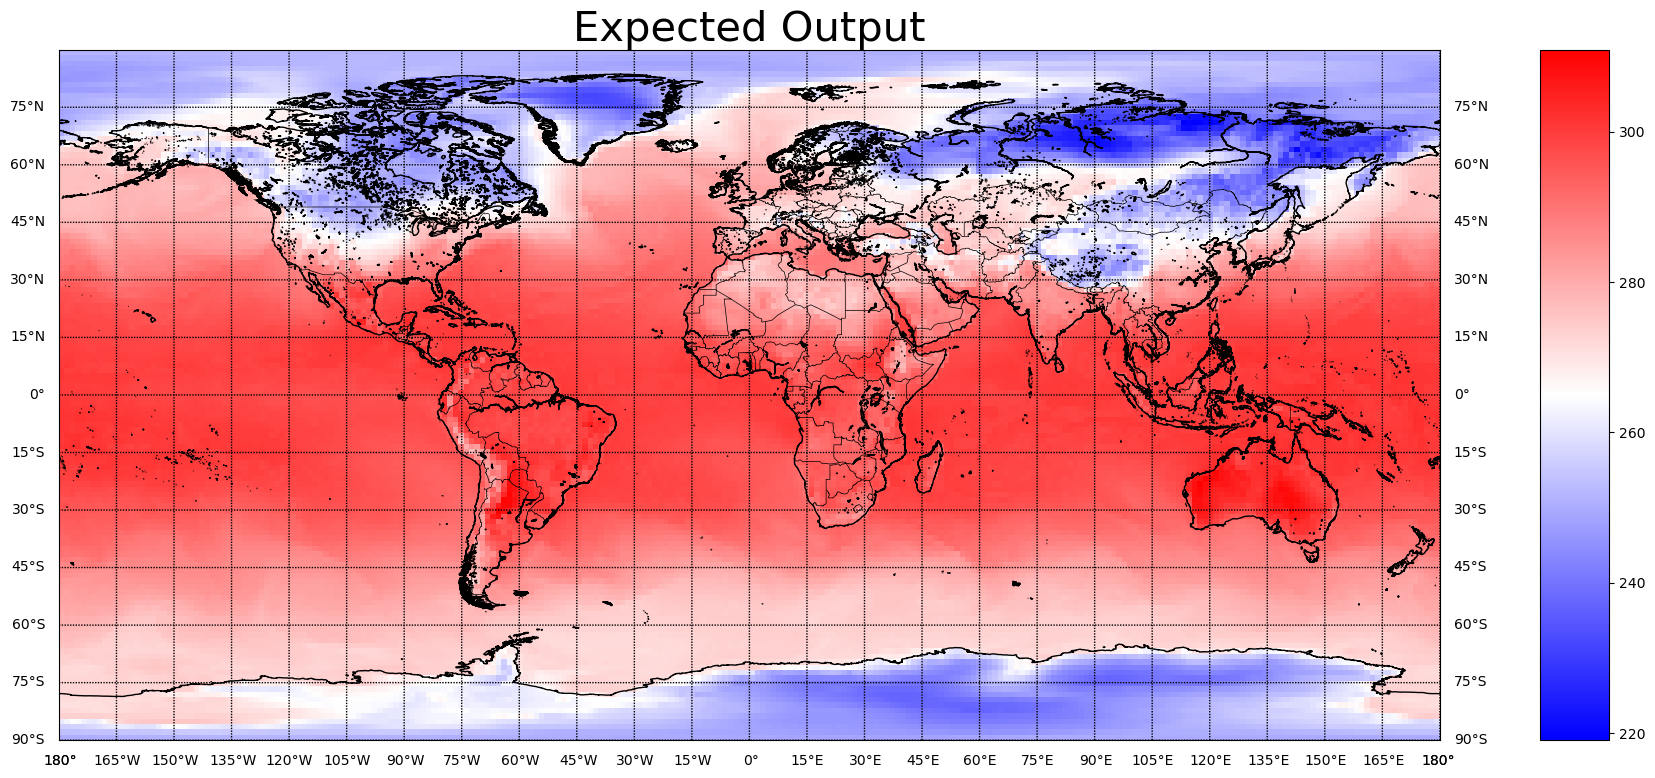

In [46]:
with open(r'/home/prateiksinha/ClimaX/sep_6_json/final_invars_2_hrs_0048.json', 'r') as f:
    data1 = json.load(f)
report(data1, 0)

In [35]:
with open(r'/home/advit/sep6_exps/final_invars_48_hrs_0006.json', 'r') as f:
    data1 = json.load(f)    
    data = data1[0]
    output = np.array(data['output']).squeeze()
    input = np.array(data['input']).squeeze()
    prediction = np.array(data['prediction']).squeeze()

    print(np.amin(input))
    print(np.amax(input))
    
    print("========")
    print(np.amin(prediction))
    print(np.amax(prediction))
    print("============")
    print(np.amin(output))
    print(np.amax(output))

220.79373168945312
310.629638671875
251.4746551513672
306.7827453613281
219.593505859375
315.0447998046875
